# Moving the sensor away from the ESP8266

The [previous experiment](FoamCoreExperiment.ipynb) showed that adding a piece of foam core board between the temperature sensor board and the ESP8266 board reduced spread in temperature readings, but those values were still high compared to the room thermostat. The burning question: How much is heat from the ESP8266 board influencing the sensor?

For this experiment, I chose two sensors (`:A0` and`:2B`) that seemed to be behaving very closely with respect to temperature. `:2B` will be the control.

Initial conditions where a 75F reading on the room thermostat, and 76F on a digital cooking thermometer placed atop the thermostat. Moving the tip of the cooking thermometer to the back of the CPU board showed a temperature of 86F. Something on the ESP8266 board is putting off significant heat.

Just before noon, I pulled the sensor board off of the `:A0` ESP8266, and reattached it using 4" jumper wires. (I was concerned about this being a fragile configuration, but the jumpers attached firmly.) That changed the configuration to

![Configuration with one sensor moved](sensormoved.jpg)

(The SHT30 is an I2C device, so only four jumpers are needed for a connection.)

The code below is explained in the [InitialTemperatureValues](InitialTemperatureValues.ipynb) notebook.


In [2]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 5)
import pandas as pd

In [10]:
df = pd.read_csv('movesensors.csv', header=None, names=['time', 'mac', 'f', 'h'], parse_dates=[0])

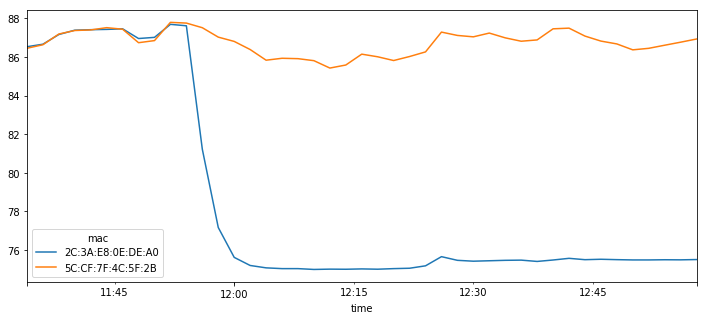

In [7]:
per_sensor_f = df.pivot(index='time', columns='mac', values='f')
downsampled_f = per_sensor_f.resample('2T').mean()
downsampled_f.plot();

Wow. Moving the sensor away from the ESP8266 drops the temperature reading over 10F, producing values that are consistent with the room thermostat. It also appears to reduce jitter in the readings.

How are humidity readings affected?

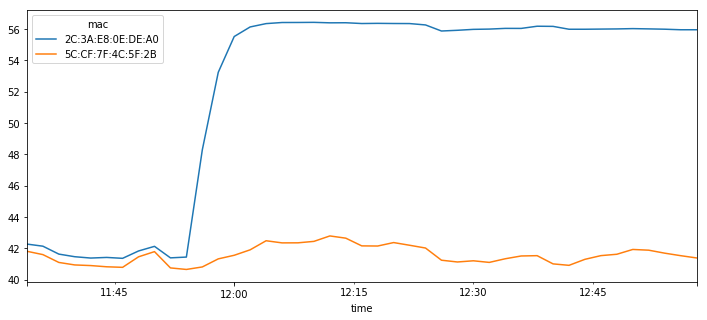

In [9]:
per_sensor_h = df.pivot(index='time', columns='mac', values='h')
downsampled_h = per_sensor_h.resample('2T').mean()
downsampled_h.plot();

This brings the humidity in line with the weather report (Weather Underground was reporting the local humidity as 51%, but the house gets stuffy when closed up for the day, so 56% is believable).

## Conclusions and next steps

Being able to snap a temperature/humidity sensor onto the small Wemos D1 mini ESP8266 board sounds simple and appealing. Alas, experience and measurement has shown that the something on the ESP8266 is producing significant heat. The SHT30 chip may be fairly precise, but when parked next to a heat source, the chip's ability to measure the ambient air temperature in a still room isn't very good.

Next, the other 4 sensors get the jumper treatment. I'll then run them that way for a while to see how much additional adjustment is needed. (There's still one errant sensor producing low temperature readings; I suspect it'll read even lower.)

